# Collecting metrics from single lines

Leanne Friedrich 7/22/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
import py.fileHandling as fh
from py.config import cfg
import py.logs as logs
import py.vidplots as vp
import py.metrics as me
LOGGERDEFINED = logs.openLog('vidplots.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

In [3]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

# measuring stills

## measure all stills

In [ ]:
ftop = os.path.join(cfg.path.server, 'singleLines', r'LapRD LapRD 1day')
me.measureStillsRecursive(ftop, diag=0,  overwrite=True, overwriteList=['vert'], critHorizLines=2)

## measure one folder

In [ ]:
file = os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_7.5_VS_5_211109')
me.measureStills(file, overwrite=True, overwriteList=['vert'])

##### delete all horizontal summaries from 09/22/21 (bad contrast=bad data)

In [102]:
ftop = os.path.join(cfg.path.server, r'singleLines\mineral812S LapRDT')
for f in os.listdir(ftop):
    for f1 in os.listdir(os.path.join(ftop,f)):
        if '210922' in f1:
            f2 = os.path.join(ftop,f, f1,f1+'_horizSummary.csv')
            if os.path.exists(f2):
                os.remove(f2)

## diagnostics

##### initialize the folder and check if the summaries are good

In [5]:
folder = os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_7.5_VS_5_211109')

In [196]:
i = '4.00'
s = '4.00'
folder = os.path.join(cfg.path.server, r'singleLines\LapRD LapRD 1day',f'I_{i}_S_{s}', f'I_{i}_S_{s}_210727')
# folder = os.path.join(cfg.path.server, r'singleLines\mineral812S LapRDT', f'I_M{i}S_S_{s}T', f'I_M{i}S_S_{s}T_210922')
# folder = os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_10_211109')
me.checkAndDiagnoseRecursive(folder, redo=False)

INFO: Problems detected in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_4.00_S_4.00\I_4.00_S_4.00_210727


,code,description,value,st
0,1,Missing # vert lines,"{1, 2, 4}",vert
1,2,Missing # horiz lines,{1},horiz
2,5,Inconsistent horiz values,[totarea],horiz


##### collect existing summary data into a table

In [21]:
r,_ = me.stillsSummary(folder, '', filename='empty.csv')
display(r[['bn', 'vert_meanTN', 'dEst', 'vert_hN']])

,bn,vert_meanTN,dEst,vert_hN
0,I_3.00_S_3.00_VI_7.5_VS_5_211109,0.99,0.74,1.07


##### initialize the folder from the bad_read list

In [48]:
i = 10
br = bad_read.iloc[i]
folder = br['folder']
br

IndexError: single positional indexer is out-of-bounds

##### preview measurements of just one line, with diagnostics

INFO: Threshold: 180, product: 51.0085215116208, white:80


({'line': 1.0,
  'aspect': 6.871170731707317,
  'area': 222068.91576260942,
  'x0': 303.30330330330327,
  'y0': 378.37837837837833,
  'w': 177.17717717717716,
  'h': 2135.135135135135,
  'xc': 366.3663663663663,
  'yc': 1459.4594594594594,
  'vest': 17665254.352579713,
  'roughness': 0.019077165964834553,
  'emptiness': 0.08098577276964858,
  'meanT': 103.47581624177369,
  'stdevT': 0.11146928609399018,
  'minmaxT': 0.40629824019759186,
  'vintegral': 16938834.480024494,
  'vleak': 28407.851570085706},
 {'line': '',
  'aspect': 'h/w',
  'area': 'px',
  'x0': 'px',
  'y0': 'px',
  'w': 'px',
  'h': 'px',
  'xc': 'px',
  'yc': 'px',
  'vest': 'px^3',
  'roughness': '',
  'emptiness': '',
  'meanT': 'px',
  'stdevT': 'meanT',
  'minmaxT': 'meanT',
  'vintegral': 'px^3',
  'vleak': 'px^3'})

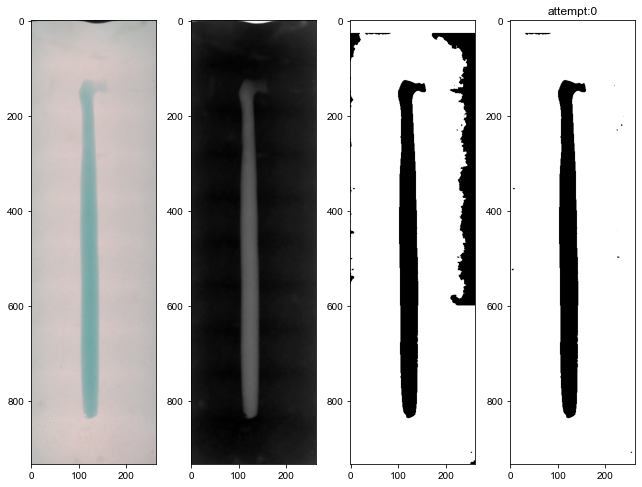

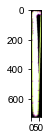

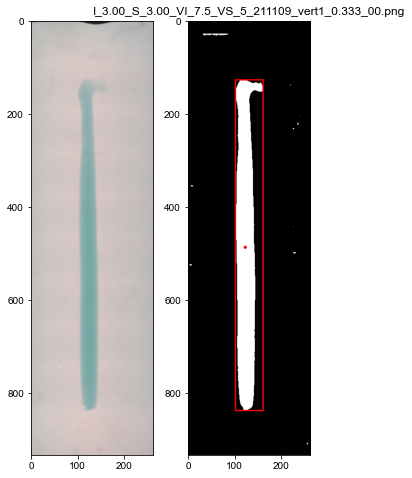

In [15]:
me.measure1Line(os.path.join(folder), 'vert', 0, diag=3, critHorizLines=2, topthresh=130)

##### measure all stills for the folder, for stills in the overwrite list

In [3]:
topdir = os.path.join(cfg.path.server, 'singleLines', 'vels mineral LapRD', 'I_M5_S_3.00', 'I_M5_S_3.00_VI_20_VS_40_211005')
folders = [os.path.join(topdir, f) for f in os.listdir(topdir)]

INFO: Measuring I_PDMSM10_S_2.25_210630
INFO: Threshold: 130, product: 5.368510727517372, white:80
INFO: ylocs: [272.10761027629667, 513.0655619596541, 719.9724018973695]


,line,segments,maxlen,totlen,maxarea,totarea,roughness,meanT,stdevT,minmaxT,vest
0,0,1,424.91,424.91,83041.50,83041.50,0.0,195.43,0.07,0.24,1.08e+07
1,1,2,282.05,439.56,55870.87,75138.54,0.0,198.09,0.02,0.06,1.15e+07
2,2,1,285.71,285.71,62230.81,62230.81,0.0,217.81,0.01,0.03,7.94e+06


INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\PDMSM LapRD\I_PDMSM10_S_2.25\I_PDMSM10_S_2.25_210630\I_PDMSM10_S_2.25_210630_horizSummary.csv


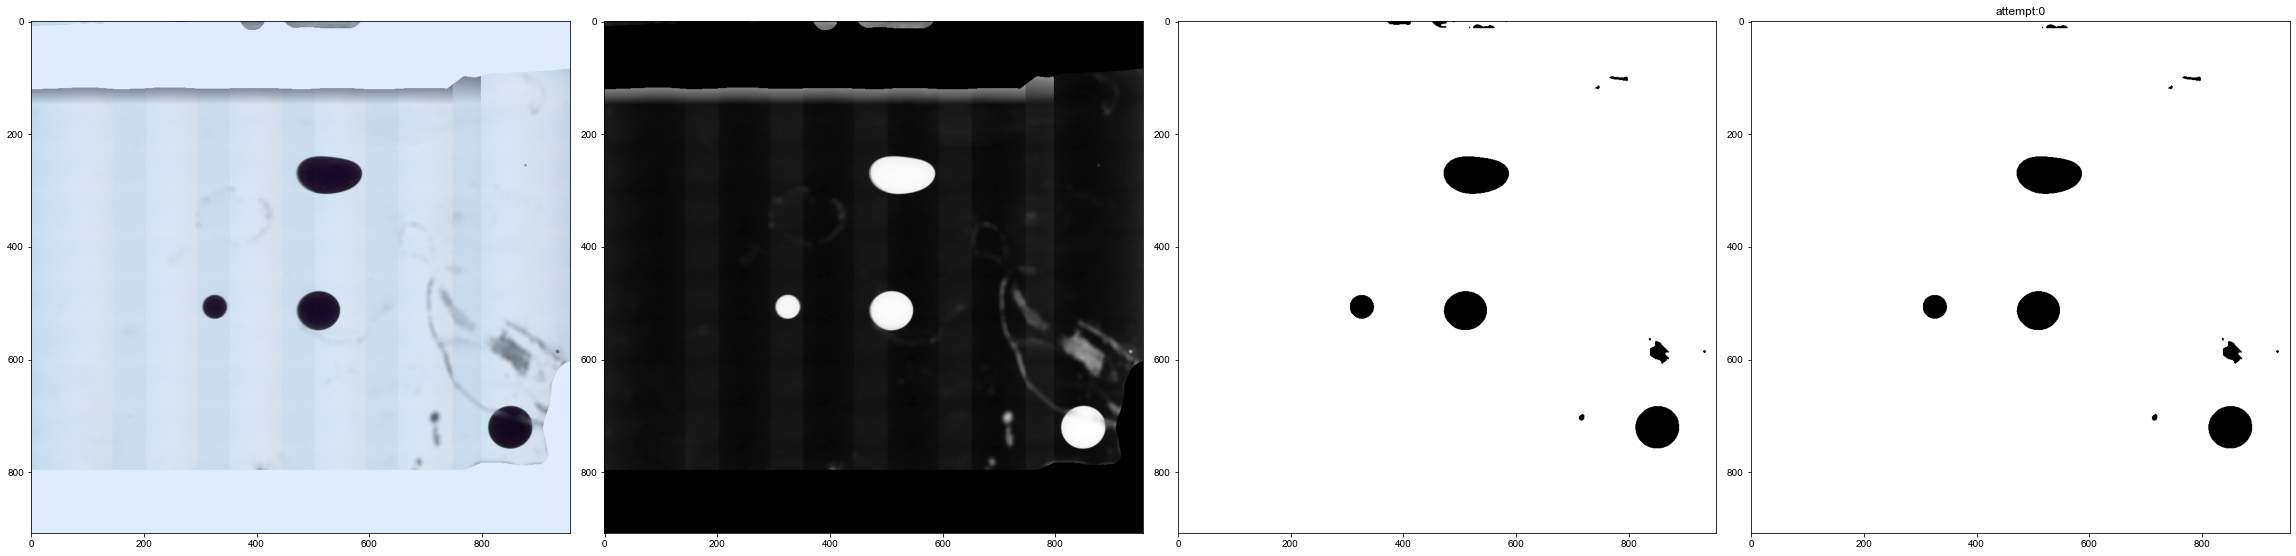

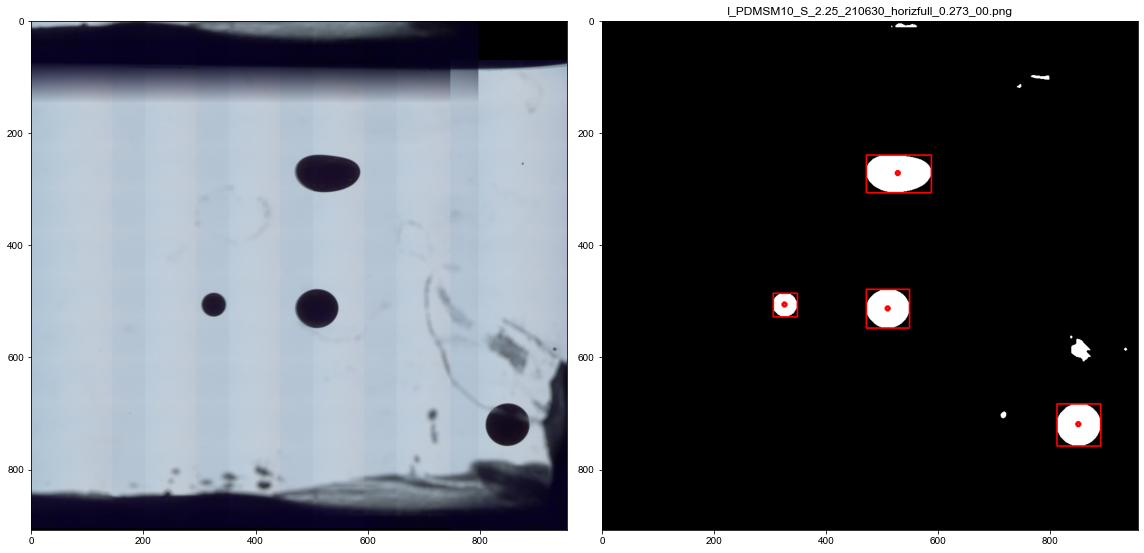

In [19]:
me.measureStills(folder, overwrite=True, overwriteList=['horiz'], diag=2, critHorizLines=2, topthresh=130)

##### make a copy of the stitched image

In [ ]:
me.copyImage(folder, 'horiz', 0)

##### open the stitched image

In [432]:
me.openImageInPaint(folder, 'horiz', 0)

In [43]:
me.openExplorer(folder)